# 1교시

## 1. 랜덤시드를 1234로 설정하고, 표준정규분포에 따른 랜덤한 수를 1000개 만드세요

In [3]:
import numpy as np
import pandas as pd

In [16]:
np.random.seed(1234)
num = np.random.randn(1000)

## 1-1. 위에서 만든 num을 4등분을 나누고 각각 'A1', 'A2', 'A3', 'A4'로 이름을 지정하세요

In [17]:
s = pd.qcut(num,4,labels=['A1','A2','A3','A4'])
s

['A3', 'A1', 'A4', 'A2', 'A1', ..., 'A3', 'A4', 'A3', 'A4', 'A1']
Length: 1000
Categories (4, object): ['A1' < 'A2' < 'A3' < 'A4']

## 1-2. 각 구간별 평균과 합계를 구하고 컬럼의 이름을 '평균', '합계' 로 지정하세요

In [14]:
num = pd.DataFrame(num)
num.groupby([s]).agg([('평균','mean'),('합계','sum')])

0            
          평균          합계
A1 -1.217922 -304.480477
A2 -0.288564  -72.141089
A3  0.314758   78.689568
A4  1.254690  313.672580

In [18]:
num = pd.Series(num)
num.groupby([s]).agg([('평균','mean'),('합계','sum')])

,평균,합계
A1,-1.217922,-304.480477
A2,-0.288564,-72.141089
A3,0.314758,78.689568
A4,1.254690,313.672580


## 2-1. 0,1,2,3 중에 중복을 허용하여 20개를 뽑은 리스트 li를 만드세요

In [23]:
np.random.seed(1234)
li = np.random.choice(a=[0,1,2,3],size=20)
li

array([3, 3, 2, 1, 0, 0, 0, 1, 3, 1, 3, 1, 2, 2, 3, 2, 0, 0, 2, 2])

## 2-2. blood_type 리스트의 4개의 혈액형을 li를 이용하여 카테고리형 데이터를 만드세요

In [26]:
blood_type = ["A", "B", "O", "RH-"] 

In [30]:
cat = pd.Categorical.from_codes(li,blood_type)
cat

['RH-', 'RH-', 'O', 'B', 'A', ..., 'O', 'A', 'A', 'O', 'O']
Length: 20
Categories (4, object): ['A', 'B', 'O', 'RH-']

## 2-3. 이름과 위에서 만든 혈액형 카테고리를 매칭시켜 혈액형별 합계를 구하세요

In [28]:
names = ['주원', '민서', '시우', '하준', '하은', '도윤', "한영", '도현', '성현', '지유', '민준', '지민', '지호', '서현', '준우', '서연', '하윤', '서윤', '지우', '윤서'] 

In [36]:
pd.DataFrame(names).groupby(cat).size()

A      5
B      4
O      6
RH-    5
dtype: int64

## 3-1. 전체재고 수량을 파악하고, 불량구역에 있는 (Defective zone) 총 재고를 구하세요

In [38]:
inv = pd.read_excel("inventory_Seoul.xlsx")
inv[:5]

,품목명,로케이션명,재고수량(A),품목코드,창고코드
0,0.75KW IE3 2/3V IP44 중국,WS1-A-01-03-01,2,DSKMTS3P11C,1001
1,0.75KW IE3 2/3V IP44 중국,WS1-A-01-10-01,1,DSKMTS3P11C,1001
2,0.75KW IE3 2/3V IP44 중국,WS1-A-01-01-01,6,DSKMTS3P11C,1001
3,0.75KW IE3 2/3V IP44 중국,WS1-C-01-01-04,1,DSKMTS3P11C,1001
4,0.75KW IE3 2/3V IP44 중국,Defective Zone,1,DSKMTS3P11C,1001


In [39]:
inv['재고수량(A)'].sum()

490

In [49]:
inv[inv['로케이션명'] == 'Defective Zone']['재고수량(A)'].sum()

11

In [ ]:
inv["재고수량(A)"].sum()
inv[inv["로케이션명"].isin(["Defective Zone"])]["재고수량(A)"].sum() 

In [ ]:
inv['재고수량(A)'].sum()

inv.query(' 로케이션명 == "Defective Zone" ')['재고수량(A)'].sum() 

## 4-1. users, ratings, moives 를 합쳐주세요

In [52]:
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat.txt', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat.txt', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat.txt', sep='::',
                       header=None, names=mnames, engine='python') 

In [53]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [57]:
data = pd.merge(users, ratings).merge(movies) 

## 4-2. pivot_table을 사용하여 성별에 따른 각 영화의 평균 평점을 구하세요

In [60]:
mean_ratings = pd.pivot_table(data=data,index='title',columns='gender',values='rating')

## 4-3. mean_ratings 여자 컬럼의 내림차순으로, 남자는 오름차순으로 정렬하세요

In [68]:
mean_ratings.sort_values(by=['F','M'], ascending=[False,True])

gender,F,M
title,,
Country Life (1994),5.0,2.000000
"Woman of Paris, A (1923)",5.0,2.428571
"Other Side of Sunday, The (Søndagsengler) (1996)",5.0,2.928571
Belly (1998),5.0,3.000000
For the Moment (1994),5.0,3.000000
...,...,...
Follow the Bitch (1998),NaN,5.000000
Lured (1947),NaN,5.000000
Schlafes Bruder (Brother of Sleep) (1995),NaN,5.000000


# 2교시 :574p ~

In [71]:
fec =pd.read_csv('https://raw.githubusercontent.com/benrolfs/pydata/master/ch09/P00000001-ALL.csv')
fec

C:\Users\user\AppData\Local\Temp\ipykernel_1320\2538123468.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec =pd.read_csv('https://raw.githubusercontent.com/benrolfs/pydata/master/ch09/P00000001-ALL.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


In [73]:
fec[123456:123457]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
123456,C00431445,P80003338,"Obama, Barack","ELLMAN, IRA",TEMPE,AZ,852816719,ARIZONA STATE UNIVERSITY,PROFESSOR,50.0,01-DEC-11,NaN,NaN,NaN,SA17A,772372


In [74]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [75]:
fec = fec.iloc[:,[2,5,7,8,9]]
fec[:5]

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle",AL,RETIRED,RETIRED,250.0
1,"Bachmann, Michelle",AL,RETIRED,RETIRED,50.0
2,"Bachmann, Michelle",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0
3,"Bachmann, Michelle",AR,NONE,RETIRED,250.0
4,"Bachmann, Michelle",AR,NONE,RETIRED,300.0


In [77]:
fec['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [78]:
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'} 

## cand_nm 에 맞는 정당칼럼을 만들자

In [80]:
fec['party']=fec.cand_nm.map(parties)

C:\Users\user\AppData\Local\Temp\ipykernel_1320\1183747149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec['party']=fec.cand_nm.map(parties)


In [81]:
fec[:5]

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
0,"Bachmann, Michelle",AL,RETIRED,RETIRED,250.0,Republican
1,"Bachmann, Michelle",AL,RETIRED,RETIRED,50.0,Republican
2,"Bachmann, Michelle",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,Republican
3,"Bachmann, Michelle",AR,NONE,RETIRED,250.0,Republican
4,"Bachmann, Michelle",AR,NONE,RETIRED,300.0,Republican


## contb_receipt_amt 금액의 범위는?

In [83]:
fec['contb_receipt_amt'].max()

2014490.51

In [84]:
fec['contb_receipt_amt'].min()

-30800.0

In [85]:
fec['contb_receipt_amt'].describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

## contb_receipt_amt 에서 음수금액은 몇 개인가

In [90]:
(fec['contb_receipt_amt'] < 0).sum() 

9647

In [91]:
(fec['contb_receipt_amt'] < 0)

0          False
1          False
2          False
3          False
4          False
           ...  
1001726    False
1001727    False
1001728    False
1001729    False
1001730    False
Name: contb_receipt_amt, Length: 1001731, dtype: bool

## 기부금액이 양수인 로우만 뽑기

In [93]:
fec.query('contb_receipt_amt > 0')

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
0,"Bachmann, Michelle",AL,RETIRED,RETIRED,250.0,Republican
1,"Bachmann, Michelle",AL,RETIRED,RETIRED,50.0,Republican
2,"Bachmann, Michelle",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,Republican
3,"Bachmann, Michelle",AR,NONE,RETIRED,250.0,Republican
4,"Bachmann, Michelle",AR,NONE,RETIRED,300.0,Republican
...,...,...,...,...,...,...
1001726,"Perry, Rick",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,Republican
1001727,"Perry, Rick",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,Republican
1001728,"Perry, Rick",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,Republican
1001729,"Perry, Rick",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,Republican


In [94]:
fec = fec[fec['contb_receipt_amt'] > 0] 

In [95]:
fec

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
0,"Bachmann, Michelle",AL,RETIRED,RETIRED,250.0,Republican
1,"Bachmann, Michelle",AL,RETIRED,RETIRED,50.0,Republican
2,"Bachmann, Michelle",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,Republican
3,"Bachmann, Michelle",AR,NONE,RETIRED,250.0,Republican
4,"Bachmann, Michelle",AR,NONE,RETIRED,300.0,Republican
...,...,...,...,...,...,...
1001726,"Perry, Rick",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,Republican
1001727,"Perry, Rick",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,Republican
1001728,"Perry, Rick",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,Republican
1001729,"Perry, Rick",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,Republican


## 'Obama, Barack' , 'Romney, Mitt' 만 뽑기 

In [97]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [99]:
fec_mrbo

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
411,"Romney, Mitt",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican
412,"Romney, Mitt",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican
413,"Romney, Mitt",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican
414,"Romney, Mitt",AE,CISCO,ENGINEER,30.0,Republican
415,"Romney, Mitt",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican
...,...,...,...,...,...,...
701381,"Obama, Barack",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,Democrat
701382,"Obama, Barack",ZZ,NOT EMPLOYED,RETIRED,250.0,Democrat
701383,"Obama, Barack",ZZ,DODEA,EDUCATOR,3.0,Democrat
701384,"Obama, Barack",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,Democrat


In [ ]:
fec.query("cand_nm == 'Romney, Mitt'|cand_nm == 'Obama, Barack'") 

In [ ]:
fec_mrbo = fec[(fec['cand_nm'] == 'Obama, Barack') | (fec['cand_nm'] == 'Romney, Mitt')] 

In [101]:
fec = fec_mrbo.copy()
fec[:5]

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
411,"Romney, Mitt",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican
412,"Romney, Mitt",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican
413,"Romney, Mitt",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican
414,"Romney, Mitt",AE,CISCO,ENGINEER,30.0,Republican
415,"Romney, Mitt",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican


In [103]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'}
emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
} 

In [104]:
fec['contbr_occupation'].map(occ_mapping)

411       NaN
412       NaN
413       NaN
414       NaN
415       NaN
         ... 
701381    NaN
701382    NaN
701383    NaN
701384    NaN
701385    NaN
Name: contbr_occupation, Length: 694282, dtype: object

In [105]:
d ={'a':1,'b':2,'c':3}
d

{'a': 1, 'b': 2, 'c': 3}

### get() 함수

In [112]:
d['a']
d.get('a','f')

1

In [113]:
d.get('d','f')

'f'

In [115]:
fec['contbr_occupation'] = fec['contbr_occupation'].map(lambda x: occ_mapping.get(x,x))

In [116]:
fec['contbr_occupation']

411                     FOREIGN SERVICE OFFICER
412                     FOREIGN SERVICE OFFICER
413                        INTELLIGENCE ANALYST
414                                    ENGINEER
415                   COMPUTER SYSTEMS ENGINEER
                          ...                  
701381    GS-15 INTERNATIONAL RELATIONS OFFICER
701382                                  RETIRED
701383                                 EDUCATOR
701384    GS-15 INTERNATIONAL RELATIONS OFFICER
701385                                  TEACHER
Name: contbr_occupation, Length: 694282, dtype: object

In [117]:
fec['contbr_employer'] = fec['contbr_employer'].map(lambda x: emp_mapping.get(x,x))

In [118]:
fec['contbr_employer']

411                                US GOVERNMENT
412                                US GOVERNMENT
413                  DEFENSE INTELLIGENCE AGENCY
414                                        CISCO
415             RAYTHEON TECHNICAL SERVICES CORP
                           ...                  
701381                         HQ USFK (FKDC-SA)
701382                              NOT EMPLOYED
701383                                     DODEA
701384                         HQ USFK (FKDC-SA)
701385    THE DEPARTMENT OF DEFENSE EDUCATION AC
Name: contbr_employer, Length: 694282, dtype: object

## pivot_table을 사용하여 기부금액을 기준으로 index 는 직업, 컬럼은 정당, aggfunc='sum' 으로 만드세요 

In [122]:
by_occupation = fec.pivot_table(values='contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN


In [127]:
over2mm = by_occupation[by_occupation.sum(axis=1) > 2000000]
over2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
CEO,2074974.79,2324297.03
CONSULTANT,2459912.71,1424894.01
EXECUTIVE,1355161.05,2300947.03
HOMEMAKER,4248875.80,8147446.22
...,...,...
NOT PROVIDED,4866973.96,11396894.84
PHYSICIAN,3735124.94,1368023.96
PRESIDENT,1878509.95,2491244.89


## 기부금액 민주당 상위 10위 뽑기

In [132]:
over2mm.sort_values(by='Democrat',ascending=False)[:10]
# over2mm.sort_values(by='Republican',ascending=False)[:10]

party,Democrat,Republican
contbr_occupation,,
RETIRED,25305116.38,11508473.59
ATTORNEY,11141982.97,5364718.82
NOT PROVIDED,4866973.96,11396894.84
HOMEMAKER,4248875.80,8147446.22
PHYSICIAN,3735124.94,1368023.96
LAWYER,3160478.87,7705.20
CONSULTANT,2459912.71,1424894.01
PROFESSOR,2165071.08,161362.12
CEO,2074974.79,2324297.03


<Axes: xlabel='contbr_occupation'>

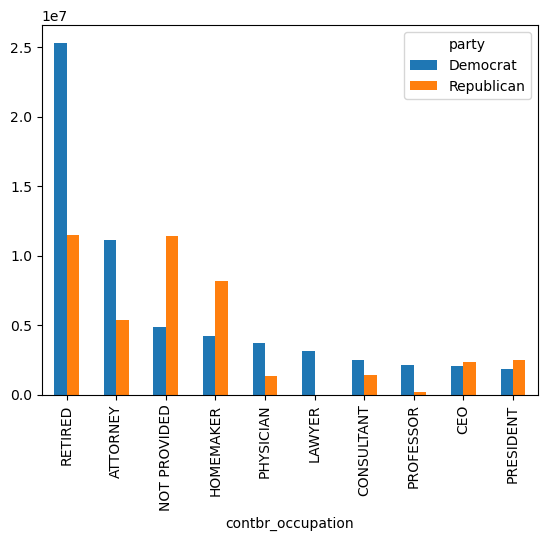

In [130]:
over2mm.sort_values(by='Democrat',ascending=False)[:10].plot(kind='bar')

In [134]:
fec['contb_receipt_amt']
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]
labels = pd.cut(fec.contb_receipt_amt,bins)

In [135]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [136]:
fec.groupby(['cand_nm', labels]).size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
                                       ...  
Romney, Mitt   (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
               (100000, 1000000]           0
               (1000000, 10000000]         0
Length: 16, dtype: int64

In [139]:
df =fec.groupby(['cand_nm', labels]).size().unstack(0)
df

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


<Axes: ylabel='contb_receipt_amt'>

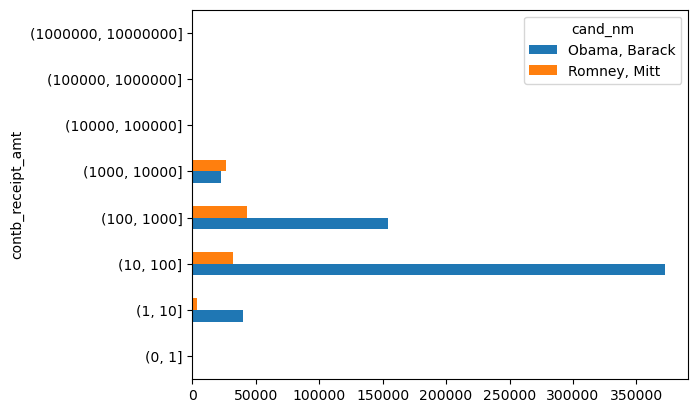

In [141]:
df.plot(kind='barh')

In [142]:
df[['Obama, Barack']]/df[['Obama, Barack']].sum()

cand_nm,"Obama, Barack"
contb_receipt_amt,
"(0, 1]",0.000837
"(1, 10]",0.068016
"(10, 100]",0.631918
"(100, 1000]",0.261388
"(1000, 10000]",0.037825
"(10000, 100000]",0.000003
"(100000, 1000000]",0.000005
"(1000000, 10000000]",0.000007


In [143]:
np.sum(df)

cand_nm
Obama, Barack    589127
Romney, Mitt     105155
dtype: int64

In [144]:
df.sum()

cand_nm
Obama, Barack    589127
Romney, Mitt     105155
dtype: int64

In [145]:
df / df.sum()

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.000837,0.000732
"(1, 10]",0.068016,0.035005
"(10, 100]",0.631918,0.302915
"(100, 1000]",0.261388,0.412315
"(1000, 10000]",0.037825,0.249023
"(10000, 100000]",0.000003,0.000010
"(100000, 1000000]",0.000005,0.000000
"(1000000, 10000000]",0.000007,0.000000


In [146]:
df

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [147]:
df.sum(axis=1)

contb_receipt_amt
(0, 1]                    570
(1, 10]                 43751
(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(10000, 100000]             3
(100000, 1000000]           3
(1000000, 10000000]         4
dtype: int64

In [148]:
df / df.sum(axis=1)

,"Obama, Barack","Romney, Mitt","(0, 1]","(1, 10]","(10, 100]","(100, 1000]","(1000, 10000]","(10000, 100000]","(100000, 1000000]","(1000000, 10000000]"
contb_receipt_amt,,,,,,,,,,
"(0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 10]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10, 100]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(100, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1000, 10000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df.div(df.sum(),axis=0)

cand_nm,"Obama, Barack","Romney, Mitt"
"(0, 1]",NaN,NaN
"(1, 10]",NaN,NaN
"(10, 100]",NaN,NaN
"(100, 1000]",NaN,NaN
"(1000, 10000]",NaN,NaN
"(10000, 100000]",NaN,NaN
"(100000, 1000000]",NaN,NaN
"(1000000, 10000000]",NaN,NaN
"Obama, Barack",NaN,NaN
"Romney, Mitt",NaN,NaN


In [152]:
df.div(df.sum(axis=1), axis = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.864912,0.135088
"(1, 10]",0.915865,0.084135
"(10, 100]",0.921182,0.078818
"(100, 1000]",0.780302,0.219698
"(1000, 10000]",0.459748,0.540252
"(10000, 100000]",0.666667,0.333333
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

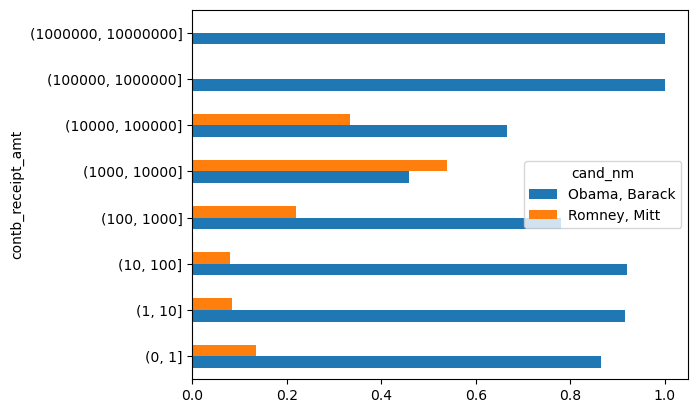

In [153]:
df.div(df.sum(axis=1), axis = 0).plot(kind='barh')

# 5교시 : 550p ~ 

In [155]:
!type datasets\babynames\yob1880.txt 

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

In [160]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt", names = ['name','gender','births'])
names1880[:2]

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604


In [169]:
names1880.groupby('gender')['births'].sum()

gender
F     90993
M    110493
Name: births, dtype: int64

In [174]:
data=[]

In [209]:
years = range(1880, 2011)
pieces = []
columns = ['name','gender','births']

for year in years:
      path = 'datasets/babynames/yob%d.txt' % year
      frame = pd.read_csv(path, names = columns)
      frame['year'] = year
      pieces.append(frame)

      
names = pd.concat(pieces, ignore_index=True)

In [210]:
names

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [211]:
total_births = names.pivot_table('births',index='year',columns='gender',aggfunc=sum)
total_births

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<Axes: title={'center': 'Total births by gender and year'}, xlabel='year'>

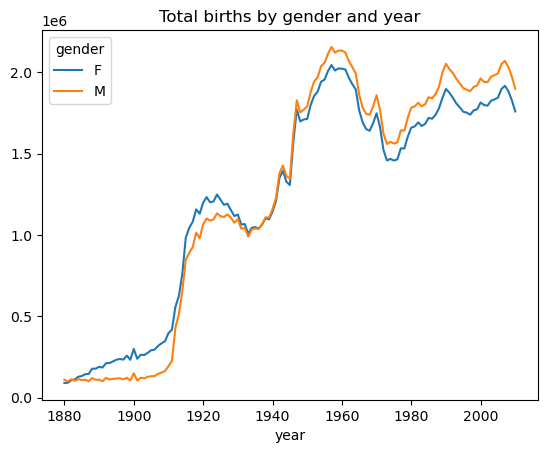

In [189]:
total_births.plot(title='Total births by gender and year')

In [212]:
frame.groupby(['gender'])['births'].sum()

gender
F    1759010
M    1898382
Name: births, dtype: int64

In [213]:
frame['births'] / frame['births'].sum()

0        0.006215
1        0.005599
2        0.004697
3        0.004610
4        0.004183
           ...   
33833    0.000001
33834    0.000001
33835    0.000001
33836    0.000001
33837    0.000001
Name: births, Length: 33838, dtype: float64

# 6교시 : 554p ~

In [214]:
def add_prop(group):
      group['prop'] = group.births / group.births.sum()
      return group

In [215]:
grouped = names.groupby(['year','gender'])

In [217]:
list(names.groupby(['year','gender']))[1]

((1880, 'M'),
            name gender  births  year
 942        John      M    9655  1880
 943     William      M    9533  1880
 944       James      M    5927  1880
 945     Charles      M    5348  1880
 946      George      M    5126  1880
 ...         ...    ...     ...   ...
 1995     Woodie      M       5  1880
 1996     Worthy      M       5  1880
 1997     Wright      M       5  1880
 1998       York      M       5  1880
 1999  Zachariah      M       5  1880
 
 [1058 rows x 4 columns])

In [221]:
names = names.groupby(['year','gender']).apply(add_prop)

C:\Users\user\AppData\Local\Temp\ipykernel_1320\1287770471.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year','gender']).apply(add_prop)


In [222]:
def get_top10(group):
      return group.sort_values(by='births',ascending=False)[:10]

grouped = names.groupby(['year','gender'])
top10 = grouped.apply(get_top10)
top10.reset_index(inplace=True , drop=True)

pieces = []
for year, group in names.groupby(['year','gender']):
      pieces.append(group.sort_values(by='births',ascending=False)[:10])
top10 = pd.concat(pieces, ignore_index=True)      

In [223]:
top10

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2615,Alexander,M,16634,2010,0.008762
2616,Noah,M,16281,2010,0.008576
2617,Daniel,M,15679,2010,0.008259
2618,Aiden,M,15403,2010,0.008114


## 580p 

In [224]:
def get_top_amounts(group, key, n=5):
      totals = group.groupby(key)['contb_receipt_amt'].sum()
      return totals.nlargest(n)


In [225]:
grouped = fec_mrbo.groupby('cand_nm')

In [227]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

## 556p

In [228]:
top10

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2615,Alexander,M,16634,2010,0.008762
2616,Noah,M,16281,2010,0.008576
2617,Daniel,M,15679,2010,0.008259
2618,Aiden,M,15403,2010,0.008114


In [229]:
top10[top10.gender == 'M']

,name,gender,births,year,prop
10,John,M,9655,1880,0.087381
11,William,M,9533,1880,0.086277
12,James,M,5927,1880,0.053641
13,Charles,M,5348,1880,0.048401
14,George,M,5126,1880,0.046392
...,...,...,...,...,...
2615,Alexander,M,16634,2010,0.008762
2616,Noah,M,16281,2010,0.008576
2617,Daniel,M,15679,2010,0.008259
2618,Aiden,M,15403,2010,0.008114


In [231]:
boys = top10[top10.gender == 'M']
girls = top10[top10.gender != 'M']

In [232]:
total_births = top10.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births

name,Abigail,Aiden,Alexander,Alexis,Alice,Amanda,Amy,Andrew,Angela,Anna,...,Steven,Susan,Tammy,Taylor,Thomas,Tracy,Tyler,Virginia,Walter,William
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,1414.0,NaN,NaN,NaN,NaN,2604.0,...,NaN,NaN,NaN,NaN,2534.0,NaN,NaN,NaN,NaN,9533.0
1881,NaN,NaN,NaN,NaN,1308.0,NaN,NaN,NaN,NaN,2698.0,...,NaN,NaN,NaN,NaN,2282.0,NaN,NaN,NaN,NaN,8524.0
1882,NaN,NaN,NaN,NaN,1542.0,NaN,NaN,NaN,NaN,3143.0,...,NaN,NaN,NaN,NaN,2610.0,NaN,NaN,NaN,NaN,9298.0
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3306.0,...,NaN,NaN,NaN,NaN,2316.0,NaN,NaN,NaN,NaN,8387.0
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.0,...,NaN,NaN,NaN,NaN,2572.0,NaN,NaN,NaN,NaN,8897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,15615.0,NaN,NaN,NaN,NaN,NaN,NaN,19686.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18915.0
2007,15447.0,NaN,NaN,NaN,NaN,NaN,NaN,18407.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18839.0
2008,15045.0,NaN,18639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18337.0


In [235]:
subset = total_births[['John','Harry','Mary']]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

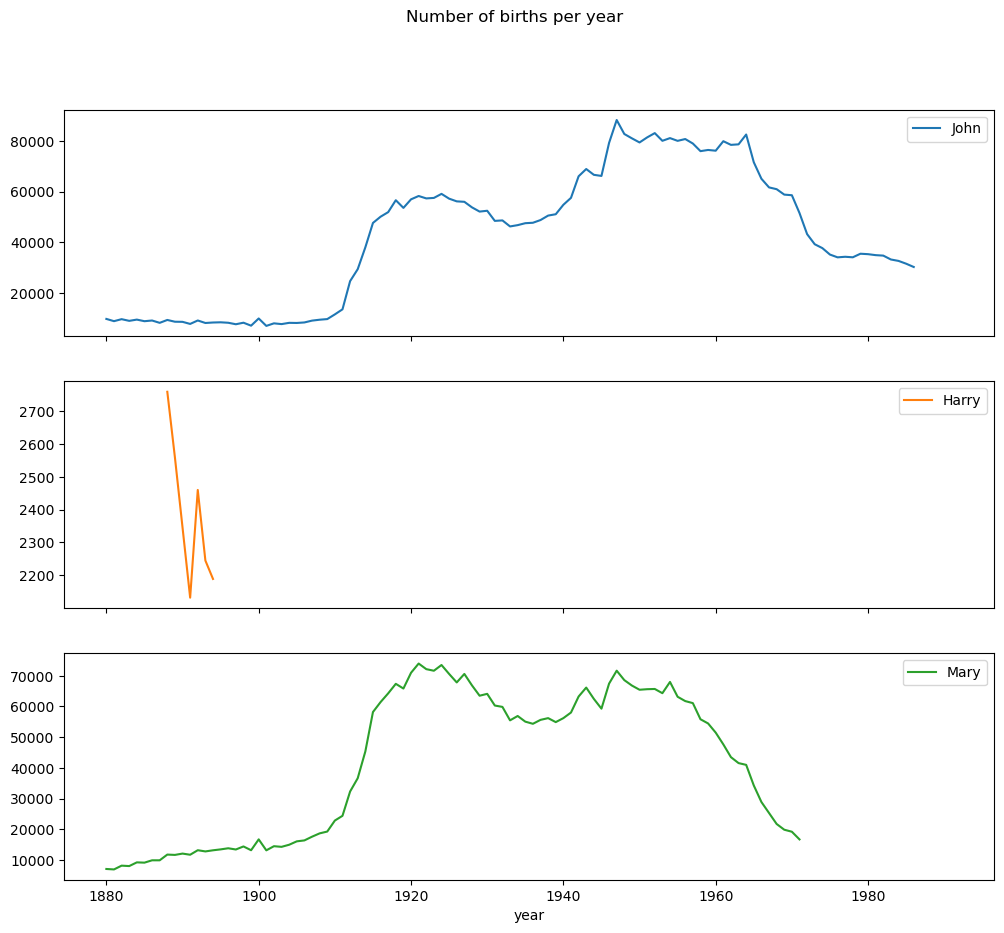

In [237]:
subset.plot(subplots=True, figsize=(12,10),grid=False,title='Number of births per year')

<Axes: title={'center': 'Number of births per year'}, xlabel='year'>

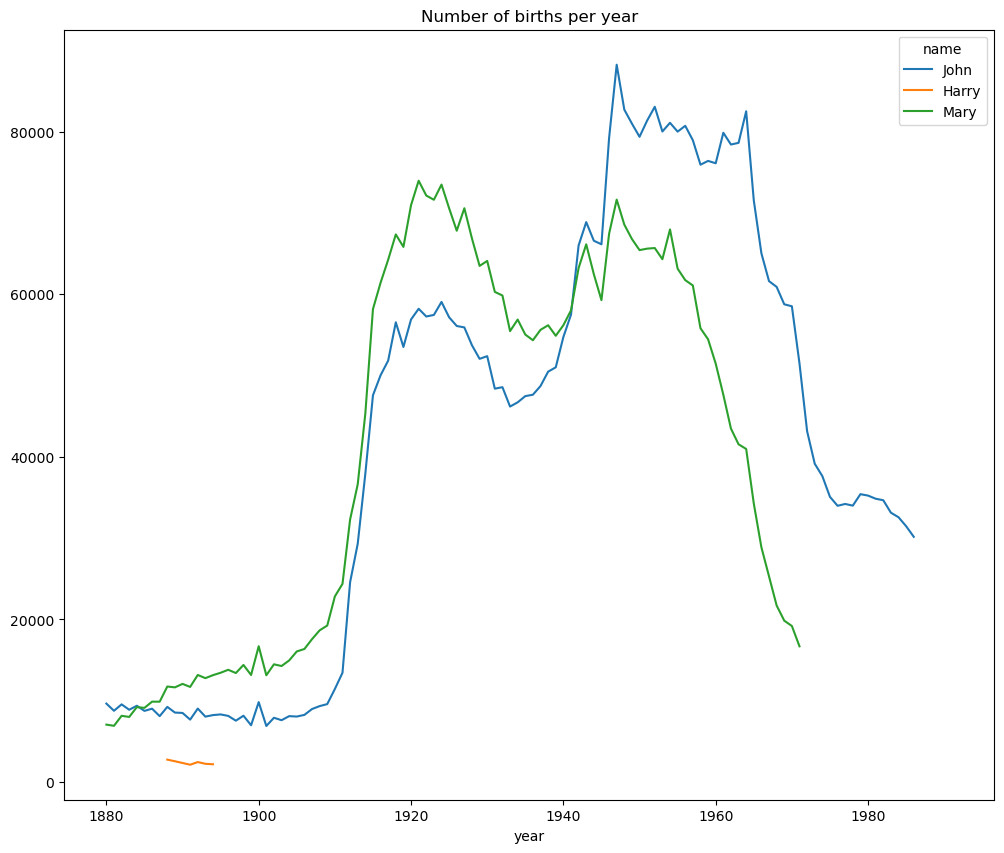

In [238]:
subset.plot(subplots=False, figsize=(12,10),grid=False,title='Number of births per year')